In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_excel("Counselling_referral data_Sep - Dec 2022 - safe2choose (1).xlsx")
df1.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,...,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,ref-Subreason 1,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,...,False,False,False,No,NaN,Suspected Pregnancy,NaN,NaN,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,...,False,False,False,No,NaN,Dropped,NaN,NaN,False,False
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ticket ID                                      2336 non-null   int64  
 1   Status                                         2336 non-null   object 
 2   Source                                         2336 non-null   object 
 3   Agent                                          2336 non-null   object 
 4   Group                                          2336 non-null   object 
 5   Created time                                   2336 non-null   object 
 6   Month                                          2336 non-null   object 
 7   Last update time                               2336 non-null   object 
 8   Resolution time (in hrs)                       2336 non-null   object 
 9   Agent interactions                             2336 

In [4]:
df1.corr()

,Ticket ID,Agent interactions,Customer interactions,Region,Age,+ days,MA,MVA/EVA,D&E,Induction,PAC,Referred to on-the-ground org,Referred to direct provider
Ticket ID,1.000000,-0.035752,-0.044351,NaN,0.178044,0.077881,-0.027744,-0.001457,0.002244,-0.004405,0.002838,-0.039085,-0.027828
Agent interactions,-0.035752,1.000000,0.754758,NaN,-0.125321,0.045541,0.560131,0.127262,0.087121,0.084799,0.275291,0.509586,0.138334
Customer interactions,-0.044351,0.754758,1.000000,NaN,0.040484,0.005504,0.474834,0.117633,0.156038,0.146411,0.191439,0.471374,0.129254
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.178044,-0.125321,0.040484,NaN,1.000000,-0.421508,0.147828,NaN,NaN,NaN,-0.007619,-0.128810,-0.100908
+ days,0.077881,0.045541,0.005504,NaN,-0.421508,1.000000,0.064458,-0.037327,-0.117358,-0.081600,0.132612,0.037633,0.070658
MA,-0.027744,0.560131,0.474834,NaN,0.147828,0.064458,1.000000,0.145971,-0.025651,-0.022612,0.187213,0.683591,0.166644
MVA/EVA,-0.001457,0.127262,0.117633,NaN,NaN,-0.037327,0.145971,1.000000,0.170755,0.118966,0.079519,0.140714,-0.007910
D&E,0.002244,0.087121,0.156038,NaN,NaN,-0.117358,-0.025651,0.170755,1.000000,0.942403,-0.010385,0.156205,0.095342
Induction,-0.004405,0.084799,0.146411,NaN,NaN,-0.081600,-0.022612,0.118966,0.942403,1.000000,-0.009787,0.169937,0.102070


In [5]:
miss = df1.isnull().sum()/len(df1) *100
miss

Ticket ID                                          0.000000
Status                                             0.000000
Source                                             0.000000
Agent                                              0.000000
Group                                              0.000000
Created time                                       0.000000
Month                                              0.000000
Last update time                                   0.000000
Resolution time (in hrs)                           0.000000
Agent interactions                                 0.000000
Customer interactions                              0.000000
First response status                             74.871575
Tags                                              44.734589
Countries (NEW)                                   75.470890
Region                                           100.000000
Agent 2                                           96.232877
Agent 3                                 

In [6]:
for i in miss.index:
    if miss[i]>60:
        df1 = df1.drop(i, 1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Ticket ID                      2336 non-null   int64 
 1   Status                         2336 non-null   object
 2   Source                         2336 non-null   object
 3   Agent                          2336 non-null   object
 4   Group                          2336 non-null   object
 5   Created time                   2336 non-null   object
 6   Month                          2336 non-null   object
 7   Last update time               2336 non-null   object
 8   Resolution time (in hrs)       2336 non-null   object
 9   Agent interactions             2336 non-null   int64 
 10  Customer interactions          2336 non-null   int64 
 11  Tags                           1291 non-null   object
 12  Language                       1758 non-null   object
 13  MA 

In [8]:
df1.isnull().sum()

Ticket ID                           0
Status                              0
Source                              0
Agent                               0
Group                               0
Created time                        0
Month                               0
Last update time                    0
Resolution time (in hrs)            0
Agent interactions                  0
Customer interactions               0
Tags                             1045
Language                          578
MA                                  0
MVA/EVA                             0
D&E                                 0
Induction                           0
PAC                                 0
Referred to on-the-ground org       0
Referred to direct provider         0
dtype: int64

In [9]:
df1.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,Tags,Language,MA,MVA/EVA,D&E,Induction,PAC,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,2,NaN,Spanish,False,False,False,False,False,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,1,Away conversation,Spanish,False,False,False,False,False,False,False
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,1,NaN,Spanish,False,False,False,False,False,False,False
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,1,NaN,Spanish,False,False,False,False,False,False,False
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,1,Away conversation,NaN,False,False,False,False,False,False,False


### Dealing with the Language missing dataset

In [10]:
df1.Language.value_counts()

Spanish       1123
English        389
Portuguese     114
French         101
Kiswahili       20
Hindi            8
Tagalog          2
Luganda          1
Name: Language, dtype: int64

In [11]:
print(df1[df1.Language.isnull()]["Group"].value_counts())
print("*****")
print(df1[df1.Language.isnull()]["Agent"].value_counts())

No Group    574
Testing       3
English       1
Name: Group, dtype: int64
*****
No Agent     573
Pauline D      5
Name: Agent, dtype: int64


> The empty cells in Langauage had the Majority falling under "No Group", therfore, the missing languages will be filled with "None"

In [12]:
df1[df1.Language.isnull()].head(3)

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,Tags,Language,MA,MVA/EVA,D&E,Induction,PAC,Referred to on-the-ground org,Referred to direct provider
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,1,Away conversation,NaN,False,False,False,False,False,False,False
10,101632,Waiting on KQ,Chat,No Agent,No Group,2022-09-25 10:07:02,September,2022-09-25 10:07:03,00:00:00,0,1,Away conversation,NaN,False,False,False,False,False,False,False
11,101633,Waiting on KQ,Chat,No Agent,No Group,2022-09-25 10:22:33,September,2022-09-25 10:22:34,00:00:00,0,1,Away conversation,NaN,False,False,False,False,False,False,False


In [13]:
df1["Language"].fillna("None", inplace = True)

### Dealing with the Tag missing dataset

In [14]:
# To deal with Tags missing value

df1.Tags.value_counts()

Away conversation                   995
Unattended - No                     153
Unattended - Yes                    139
Unattended - Yes,Unattended - No      4
Name: Tags, dtype: int64

In [15]:
print(df1[df1.Tags.isnull()]["Language"].value_counts())
print("***")
print(df1[df1.Tags.isnull()]["Source"].value_counts())
print("***")
print(df1[df1.Tags.isnull()]["Group"].value_counts())

Spanish       371
English       324
None          175
French         88
Portuguese     68
Kiswahili      12
Hindi           4
Tagalog         2
Luganda         1
Name: Language, dtype: int64
***
Email    851
Chat     194
Name: Source, dtype: int64
***
Spanish       371
English       328
No Group      171
French         88
Portuguese     68
Kiswahili      11
Hindi           4
Testing         3
Luganda         1
Name: Group, dtype: int64


> Visually looking at the dataset relating to Tags, it can be noted that tags has no visual relationship with any of the dataset, therefore the missing value will be filled with the _mode_

In [16]:
df1["Tags"].fillna(df1["Tags"].mode()[0], inplace = True)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Ticket ID                      2336 non-null   int64 
 1   Status                         2336 non-null   object
 2   Source                         2336 non-null   object
 3   Agent                          2336 non-null   object
 4   Group                          2336 non-null   object
 5   Created time                   2336 non-null   object
 6   Month                          2336 non-null   object
 7   Last update time               2336 non-null   object
 8   Resolution time (in hrs)       2336 non-null   object
 9   Agent interactions             2336 non-null   int64 
 10  Customer interactions          2336 non-null   int64 
 11  Tags                           2336 non-null   object
 12  Language                       2336 non-null   object
 13  MA 

In [18]:
df1.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,Tags,Language,MA,MVA/EVA,D&E,Induction,PAC,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,2,Away conversation,Spanish,False,False,False,False,False,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,1,Away conversation,Spanish,False,False,False,False,False,False,False
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,1,Away conversation,Spanish,False,False,False,False,False,False,False
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,1,Away conversation,Spanish,False,False,False,False,False,False,False
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,1,Away conversation,None,False,False,False,False,False,False,False


In [19]:
print(df1.MA.value_counts())
print("****")
print(df1["MVA/EVA"].value_counts())
print("****")
print(df1["D&E"].value_counts())
print("****")
print(df1.Induction.value_counts())

False    1955
True      381
Name: MA, dtype: int64
****
False    2320
True       16
Name: MVA/EVA, dtype: int64
****
False    2318
True       18
Name: D&E, dtype: int64
****
False    2320
True       16
Name: Induction, dtype: int64


Waiting on KQ                   655
Resolved                        397
Waiting on User                 308
Waiting on KQ - reminder        298
Closed                          228
Referral                        227
Evaluation sent                 154
Referral - reminder              35
Need to fill properties chat     22
Open                             12
Name: Status, dtype: int64


<AxesSubplot:>

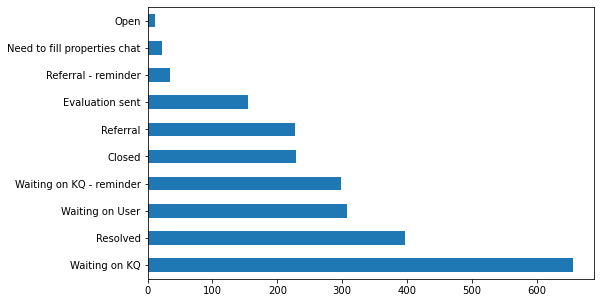

In [20]:
status = df1.Status.value_counts()
print(status)
status.plot.barh(y = status.values, figsize = (8,5))


Chat     1485
Email     851
Name: Source, dtype: int64


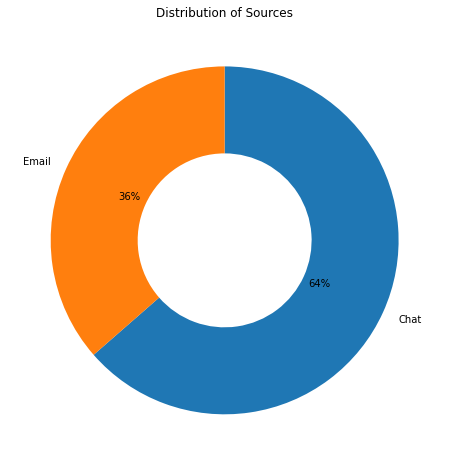

In [21]:
plt.figure(figsize = [10,8])
source = df1["Source"].value_counts()
print(source)

base_color = sns.color_palette()[0:3]
plt.pie(source, labels = source.index, 
        autopct='%.0f%%',
        wedgeprops = {"width":0.5},
        startangle = 90,
        counterclock = False,
       colors = base_color)

plt.title("Distribution of Sources");

Lucy P            102
Maria Silva        99
Emma G             97
Hellena Brinas     81
Wendy S.           79
Paty C.            67
Bonnie K           62
Salma S.           62
Teresa V.          43
Zoe Z              37
Pauline D          19
Julia L             5
Name: Agent, dtype: int64


<AxesSubplot:>

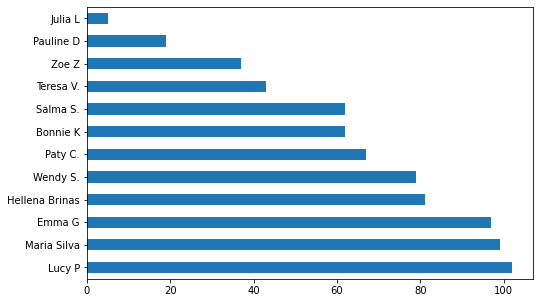

In [22]:
agent_no_agent = df1.query("Agent != 'No Agent'")  #to exclude No Agent

agent = agent_no_agent.Agent.value_counts()
print(agent)
agent.plot.barh(y = agent.values, figsize = (8,5))

Spanish       1123
No Group       574
English        393
Portuguese     114
French         101
Kiswahili       19
Hindi            8
Testing          3
Luganda          1
Name: Group, dtype: int64


<AxesSubplot:>

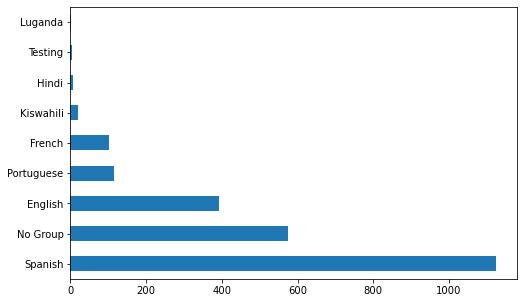

In [23]:
group = df1.Group.value_counts()
print(group)
group.plot.barh(y = group.values, figsize = (8,5))

# Google Anlaytics data_Sep-Dec 22-safe2choose

In [ ]:
df2_acq = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name = "Acquisition")
df2_age = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name = "Age")
df2_gen = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name = "Gender")
df2_pv = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name = "Page visits")
df2_geo = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name = "Geography")
df2_users = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name = "Users - Sep-Dec 22")

In [ ]:
print(df2_acq.head())
print("****")
print(df2_age.head())
print("****")
print(df2_gen.head())
print("****")
print(df2_pv.head())
print("****")
print(df2_geo.head())
print("****")
print(df2_users.head())

### Acquisition

In [ ]:
df2_acq.info()

In [ ]:
df2_acq

In [ ]:
# fill missing channel with unidentified

# df2_acq.fillna("Unidentified", inplace = True)

In [ ]:
df2_acq.corr()

> - New users and sessions are highly positively correlated with the number of users, with the bounce rate having a very low correlation with the users.
> - Bounce rate is averagely negatively correlated with the pages/sessions visited and avg. session duration.
> - Pages/Session has a weak negative correlation with the number of users, session.

In [ ]:
df_num = df2_acq.drop("Default Channel Grouping", 1)

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df_num.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df2_acq["Default Channel Grouping"].value_counts()

In [ ]:
df2_acq.describe()

In [ ]:
sns.barplot(x = "Default Channel Grouping", y = "Users", data = df2_acq)
plt.xticks(rotation = 45);

In [ ]:



plt.figure(figsize = [8,18])
plt.subplot(5, 1, 1)
sns.barplot(x = "Default Channel Grouping", y = "Users", data = df2_acq, palette = 'Blues')


ax = plt.subplot(5, 1, 2)
sns.barplot(x = "Default Channel Grouping", y = "Sessions", data = df2_acq, palette = 'Blues')


ax = plt.subplot(5, 1, 3)
sns.barplot(x = "Default Channel Grouping", y = "Bounce Rate", data = df2_acq, palette = 'Blues')

ax = plt.subplot(5, 1, 4)
sns.barplot(x = "Default Channel Grouping", y = "Pages/Session", data = df2_acq, palette = 'Blues')


ax = plt.subplot(5, 1, 5)
sns.barplot(x = "Default Channel Grouping", y = "Avg. Session Duration", data = df2_acq, palette = 'Blues');




In [ ]:
# fig, ax = plt.subplots(2,2, figsize = [15,6])


# # base_color = sns.color_palette()[0]
# sns.barplot(x = "Default Channel Grouping", y = "Users", data = df2_acq, palette = 'Blues' ax = ax[0])
# ax[0].set_ylabel("Duration (Secs)")
# ax[0].set_xlabel("User Type")

# sns.barplot(x = "Default Channel Grouping", y = "Sessions", data = df2_acq, palette = 'Blues', ax = ax[1])
# plt.suptitle("Trip By User Type", fontsize = 20, fontweight='bold')
# ax[1].set_ylabel("Duration (Secs)")
# ax[1].set_xlabel("User Type")

# sns.barplot(x = "Default Channel Grouping", y = "Pages/Session", data = df2_acq, palette = 'Blues', ax = ax[3])
# ax[3].set_ylabel("Duration (Secs)")
# ax[3].set_xlabel("User Type")

# sns.barplot(x = "Default Channel Grouping", y = "Bounce Rate", data = df2_acq, palette = 'Blues', ax = ax[4])
# plt.suptitle("Trip By User Type", fontsize = 20, fontweight='bold')
# ax[4].set_ylabel("Duration (Secs)")
# ax[4].set_xlabel("User Type");

### Age

In [ ]:
df2_age

In [ ]:
sns.barplot(x = "Age", y = "Users", data = df2_age, palette = 'Blues');

### Gender

In [ ]:
df2_gen

In [ ]:
sns.barplot(x = "Gender", y = "Users", data = df2_gen, palette = 'Blues_d');

### Geography

In [ ]:
df2_geo

In [ ]:
df2_geo.info()

In [ ]:
# fill missing channel with unidentified

# df2_geo.fillna("Unidentified", inplace = True)

In [ ]:
df2_geo.corr()

> - New users and sessions are highly positively correlated with the number of users, with the bounce rate having a very low correlation with the users.
> - Bounce rate is highly negatively correlated with the pages/sessions visited and avg. session duration.
> - Pages/Session has a positive correlation with the avg session duration.

In [ ]:
df_num = df2_geo.drop("Country", 1)

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df_num.corr(), annot=True, cmap = "rocket", fmt = ".2f")

In [ ]:
df2_geo["Country"].value_counts()

In [ ]:
df2_geo.describe()

In [ ]:
plt.figure(figsize = [8,5])
sns.barplot(x = "Country", y = "Users", data = df2_geo, palette = "rocket_r")
plt.xticks(rotation = 45);

In [ ]:
plt.figure(figsize = [8,18])
plt.subplot(5, 1, 1)
sns.barplot(x = "Country", y = "Users", data = df2_geo, palette = 'Blues')


ax = plt.subplot(5, 1, 2)
sns.barplot(x = "Country", y = "Sessions", data = df2_geo, palette = 'Blues')


ax = plt.subplot(5, 1, 3)
sns.barplot(x = "Country", y = "Bounce Rate", data = df2_geo, palette = 'Blues')

ax = plt.subplot(5, 1, 4)
sns.barplot(x = "Country", y = "Pages/Session", data = df2_geo, palette = 'Blues')


ax = plt.subplot(5, 1, 5)
sns.barplot(x = "Country", y = "Avg. Session Duration", data = df2_geo, palette = 'Blues')
plt.xticks(rotation = 45);



### Users

In [ ]:
df2_users.head()

In [ ]:
df2_users.info()

In [ ]:
df2_users.dropna(inplace= True)

In [ ]:

df2_users["month"] = df2_users["Day Index"].dt.strftime("%B")
df2_users["day"] = df2_users["Day Index"].dt.day.astype("Int64")
df2_users["year"] = df2_users["Day Index"].dt.year.astype("Int64")
df2_users["weekday"] = df2_users["Day Index"].dt.strftime("%A")

In [ ]:
df2_users.head()

In [ ]:
df2_users.month.value_counts()

In [ ]:
df2_users.day.unique()

In [ ]:
df2_users.year.unique()

In [ ]:
## which month has the highest number of users?

sns.barplot(x = "month", y = "Users", data = df2_users, palette = 'Blues')

In [ ]:
## which day has the highest number of users?
plt.figure(figsize = [18,10])
sns.barplot(x = "day", y = "Users", data = df2_users, palette = 'Blues')

In [ ]:
## which day of the week has the highest number of users?

sns.barplot(x = "weekday", y = "Users", data = df2_users, palette = 'Blues')
plt.xticks(rotation = 45);